In [1]:
import pandas as pd

NVDA = '/kaggle/input/nvidia-stock-data-2024/NVDA_1999-01-01_2024-12-04.csv'
df = pd.read_csv(filepath_or_buffer=NVDA, parse_dates=['Date'])
df['year'] = df['Date'].dt.year
df['dollars'] = 0.5 * df['Volume'] * (df['Low'] + df['High'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,year,dollars
0,1999-01-22,0.043750,0.048828,0.038802,0.041016,0.017325,2714688000,1999,1.189441e+08
1,1999-01-25,0.044271,0.045833,0.041016,0.045313,0.019140,510480000,1999,2.216734e+07
2,1999-01-26,0.045833,0.046745,0.041146,0.041797,0.017655,343200000,1999,1.508210e+07
3,1999-01-27,0.041927,0.042969,0.039583,0.041667,0.017600,244368000,1999,1.008653e+07
4,1999-01-28,0.041667,0.041927,0.041276,0.041536,0.017544,227520000,1999,9.465173e+06


Let's look at our correlations. We suspect that none of our prices are perfectly correlated, but we don't have an expectation regarding price x volume correlations.

In [2]:
df[['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']].corr()

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999872,0.999797,0.999616,0.999601,-0.148002
High,0.999872,1.000000,0.999800,0.999808,0.999796,-0.147289
Low,0.999797,0.999800,1.000000,0.999864,0.999848,-0.149101
Close,0.999616,0.999808,0.999864,1.000000,0.999986,-0.148299
Adj Close,0.999601,0.999796,0.999848,0.999986,1.000000,-0.148640
Volume,-0.148002,-0.147289,-0.149101,-0.148299,-0.148640,1.000000


None of our prices are perfectly correlated, so none of them are redundant. Let's take a look at the adjusted close price time series.

<Axes: xlabel='Date', ylabel='Adj Close'>

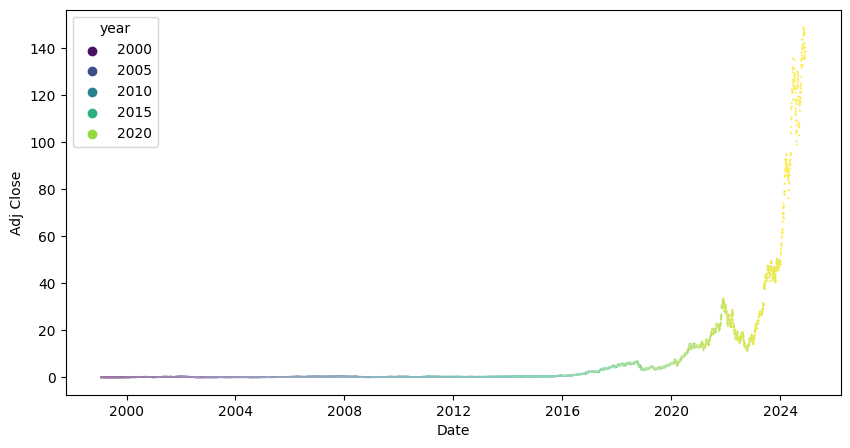

In [3]:
import matplotlib.pyplot as plt
from seaborn import scatterplot

plt.figure(figsize=(10, 5))
scatterplot(data=df, x='Date', y='Adj Close', s=2, hue='year', palette='viridis')

This graph makes the prices look like they've run up sharply over a period of six to eight years. Let's use a log plot to see if there's any price volatility prior to 2016.

<Axes: xlabel='Date', ylabel='Adj Close'>

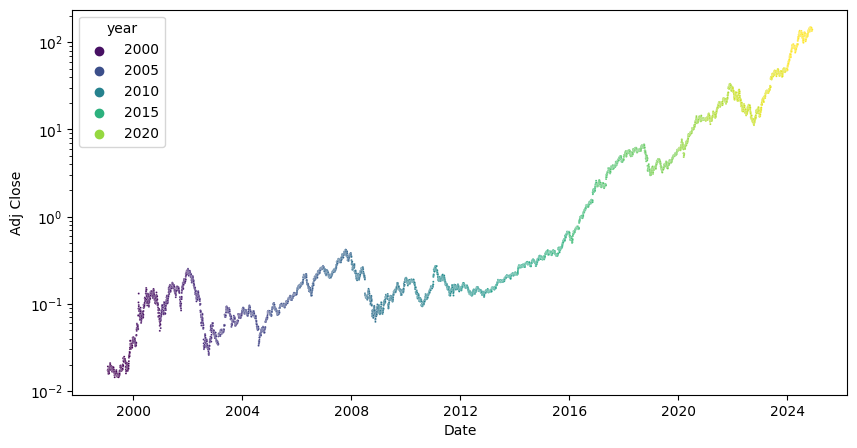

In [4]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='Adj Close', s=2, hue='year', palette='viridis')

There was actually quite a bit of price volatility prior to 2016.

We saw in the correlations above that the prices and volatility are slightly negatively correlated; what does that look like?

<Axes: xlabel='Adj Close', ylabel='Volume'>

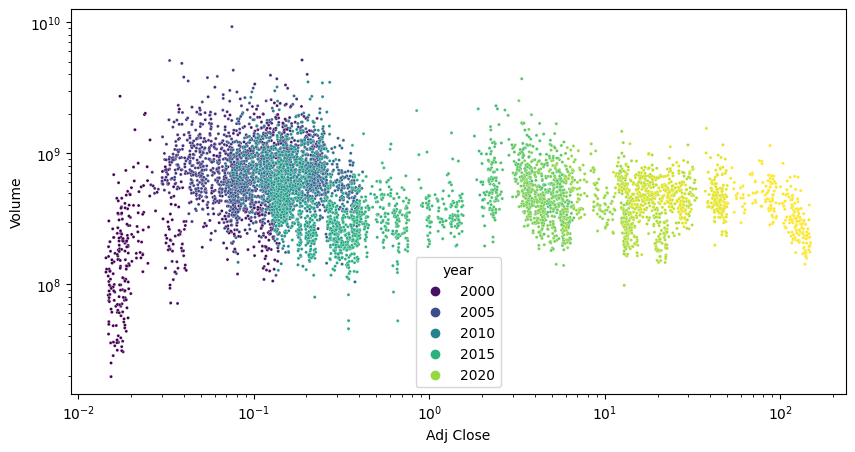

In [5]:
plt.figure(figsize=(10, 5))
plt.xscale(value='log')
plt.yscale(value='log')
scatterplot(data=df, y='Volume', x='Adj Close', s=5, hue='year', palette='viridis')

What do we see? We see that the log of the price changes quite a bit over time, but for the most part the log of the volume stays in a range. This makes our plot look like it shows the log of the volume as essentially constant as a function of the log of the price.

Let's look at the daily dollar volume over time. What do we expect? Since the price grows over time and the volume is stable, we expect the daily dollar volume to grow over time. Let's find out.

<Axes: xlabel='Date', ylabel='dollars'>

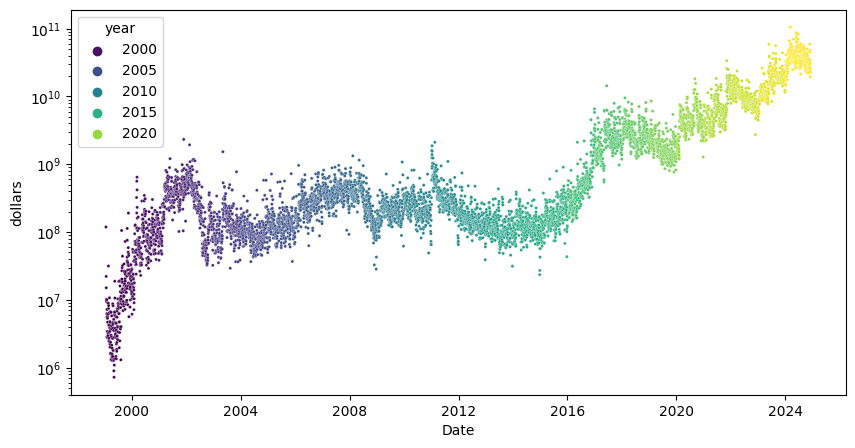

In [6]:
plt.figure(figsize=(10, 5))
plt.yscale(value='log')
scatterplot(data=df, x='Date', y='dollars', s=5, hue='year', palette='viridis')

This is in fact what we see, although we see a long period of stability, roughly twelve years long.